# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
print(f'NA-------------------------------------- \n{df.isna().sum()}')
print(f'NULL------------------------------------ \n{df.isnull().sum()}')

NA-------------------------------------- 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
NULL------------------------------------ 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
print(f"Bad Water: {df[df['Potability']==1].shape[0]}")
print(f"Good Water: {df[df['Potability']==0].shape[0]}")

Bad Water: 1278
Good Water: 1998


In [18]:
df_without_na=df.dropna()
df_without_na.shape

(2011, 10)

In [28]:
df_without_na.describe()


count    2011.000000
mean        3.969729
std         0.780346
min         1.450000
25%         3.442915
50%         3.968177
75%         4.514175
max         6.494749
Name: Turbidity, dtype: float64

## First Insight

There is many NA and the data was umbalanced

# Split in feature and targets


In [6]:
X = df.loc[:, ~df.columns.isin(['Potability'])]
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [7]:
y=df['Potability']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

# Data Manipulation

In [8]:
# Oversample 
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
X_over,y_over=oversample.fit_resample(X, y)

In [9]:
# Split train_test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X_over,y_over,train_size=0.8,random_state=42)

X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1575,NaN,263.857675,16670.996013,7.758237,NaN,427.811456,17.151969,77.810699,4.304052
506,NaN,218.302176,42061.322799,6.331177,324.541596,503.139245,15.712139,48.497826,4.328026
3592,6.960604,201.715452,11348.675997,4.297890,NaN,468.591388,10.490589,89.686196,4.978820
3847,6.704635,230.766940,9727.761716,5.943695,223.235816,405.761571,12.826509,74.385199,3.422179
3670,5.382489,240.018214,18189.394980,5.551990,397.700065,551.476202,12.818730,79.779911,4.173330


In [10]:
#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline= Pipeline(
                steps=[
                    ('imputer',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler(with_mean=False))
                ]
            ).fit(X_train)

X_train_fit=pipeline.transform(X_train)
X_train_fit

array([[4.89586701, 8.02855322, 1.86200813, ..., 5.20816113, 4.93918627,
        5.53576619],
       [4.89586701, 6.64240916, 4.69789117, ..., 4.77095953, 3.0784943 ,
        5.5666019 ],
       [4.8286128 , 6.13771512, 1.26755036, ..., 3.18544629, 5.69300665,
        6.40363704],
       ...,
       [6.09293657, 6.6342139 , 1.80756866, ..., 4.96601741, 2.98982692,
        5.49729057],
       [3.91672218, 6.67407686, 2.50810969, ..., 5.05577398, 1.9788331 ,
        5.06560984],
       [4.6465499 , 6.03337331, 3.87299825, ..., 3.69742406, 4.2273961 ,
        4.83367897]])

In [29]:
# Save for application
import pickle
pickle.dump(pipeline,open('pipeline.pkl', 'wb'))

# First trainning

Auc Score: 51.069%
Eval Accuracy: 51.625%


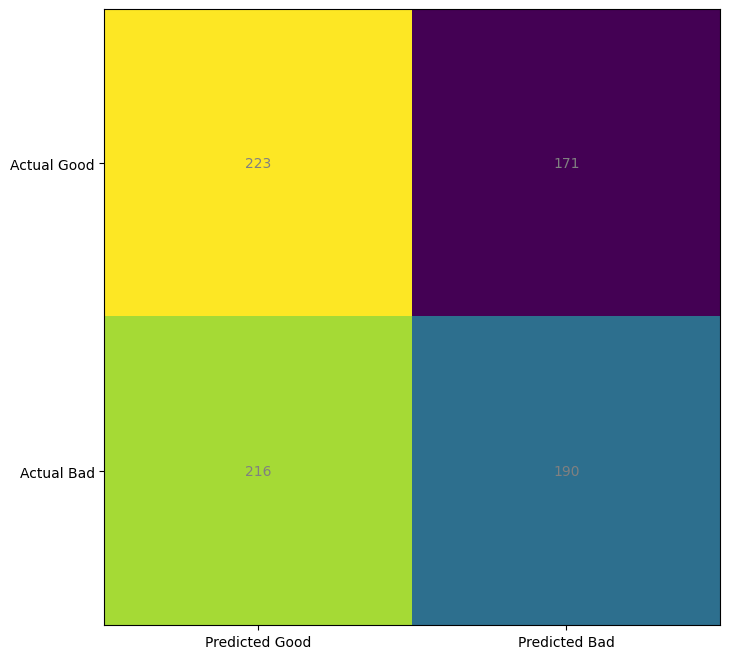

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay

model = LogisticRegression(solver='liblinear', random_state=0)
model = model.fit(X_train_fit,y_train)
train_acc=model.score(X_train_fit,y_train)
train_acc

x_test=pipeline.transform(X_test)
eval_acc = model.score(x_test, y_test)
preds = model.predict(x_test)
auc_score = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")
cm=confusion_matrix(y_test, model.predict(x_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Good', 'Predicted Bad'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Good', 'Actual Bad'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='gray')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import(
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay,accuracy_score,ConfusionMatrixDisplay

models = {
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "Logistic Regression": LogisticRegression(),
                "XGBClassifier": XGBClassifier(),
                "CatBoosting Classifier": CatBoostClassifier(verbose=False),
                "AdaBoost Classifier": AdaBoostClassifier()
            }


for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    print(model_name)
    
    model.fit(X_train_fit,y_train)
    
    train_acc=model.score(X_train_fit,y_train)
    print(f'{model_name} Model Train Accuracy: {train_acc:.2f}')


    x_test=pipeline.transform(X_test)
    preds = model.predict(x_test)    
    auc_score = roc_auc_score(y_test, preds)
    acc_score=accuracy_score(y_test,preds)

    print(f'{model_name} Model Test AUC Score: {auc_score:.2f}')
    print(f'{model_name} Model Test Accuracy Score: {acc_score:.2f}')

    print(classification_report(y_test,preds))

    RocCurveDisplay.from_predictions(y_test, preds)
    plt.title(f'{model_name}')
    plt.show()

    cm=confusion_matrix(y_test,preds,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    
    plt.title(f'{model_name}')    
    


# Final Tranning with Mlflow

Random_Forest


d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Random_Forest Model Train Accuracy: 1.00
Random_Forest Model Test AUC Score: 0.79
Random_Forest Model Test Accuracy Score: 0.79
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       394
           1       0.78      0.80      0.79       406

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



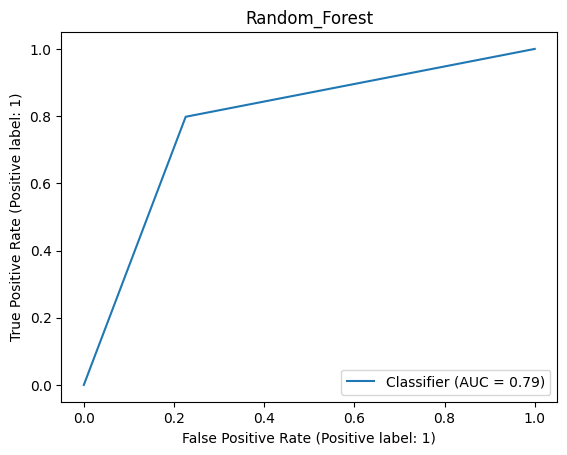

Decision_Tree
Decision_Tree Model Train Accuracy: 1.00
Decision_Tree Model Test AUC Score: 0.72
Decision_Tree Model Test Accuracy Score: 0.72
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       394
           1       0.71      0.78      0.74       406

    accuracy                           0.73       800
   macro avg       0.73      0.72      0.72       800
weighted avg       0.73      0.72      0.72       800



d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

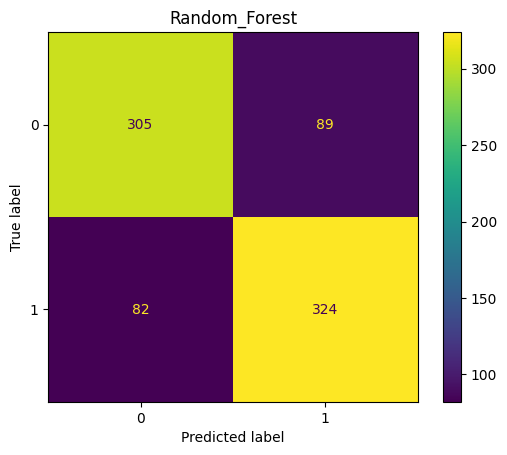

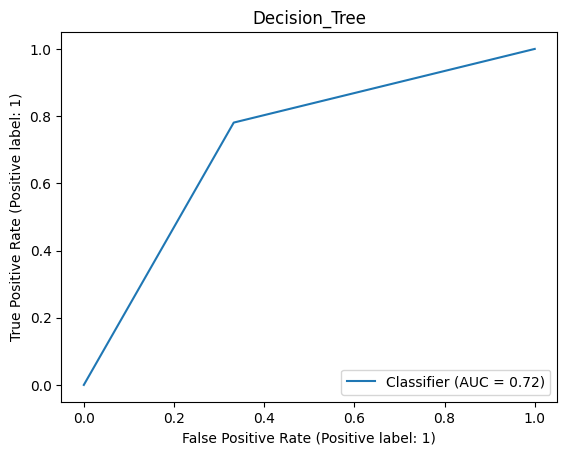

Gradient_Boosting
Gradient_Boosting Model Train Accuracy: 0.75
Gradient_Boosting Model Test AUC Score: 0.64
Gradient_Boosting Model Test Accuracy Score: 0.64
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       394
           1       0.67      0.59      0.63       406

    accuracy                           0.64       800
   macro avg       0.65      0.64      0.64       800
weighted avg       0.65      0.64      0.64       800



d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

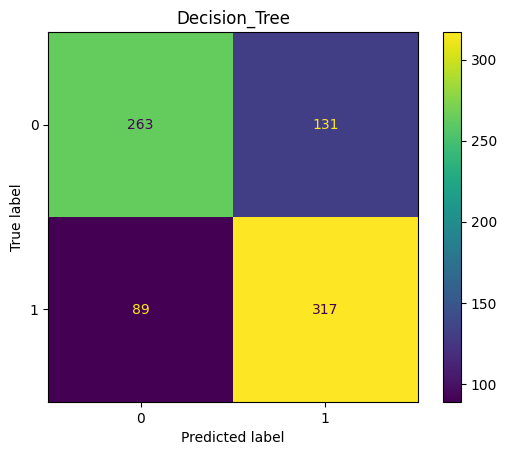

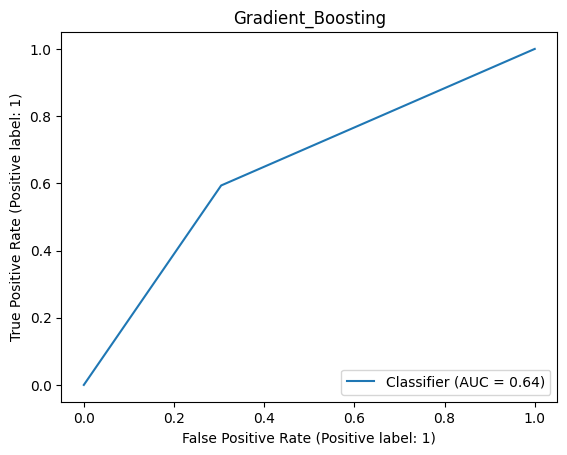

Logistic_Regression
Logistic_Regression Model Train Accuracy: 0.52
Logistic_Regression Model Test AUC Score: 0.52
Logistic_Regression Model Test Accuracy Score: 0.52
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       394
           1       0.53      0.47      0.50       406

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800



d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

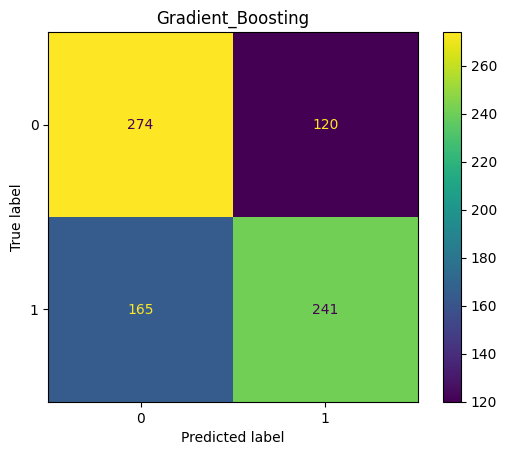

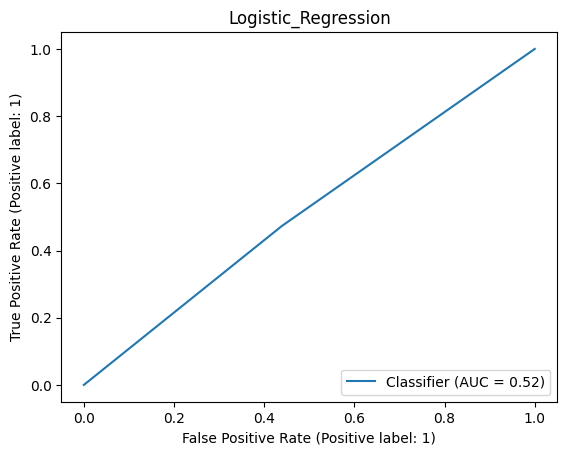

XGBClassifier


d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBClassifier Model Train Accuracy: 0.99
XGBClassifier Model Test AUC Score: 0.74
XGBClassifier Model Test Accuracy Score: 0.74
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       394
           1       0.73      0.78      0.75       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

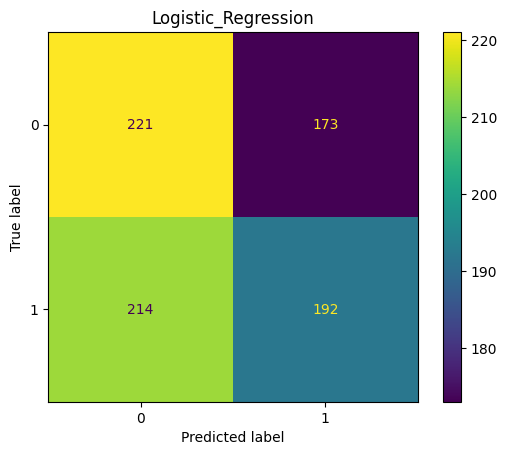

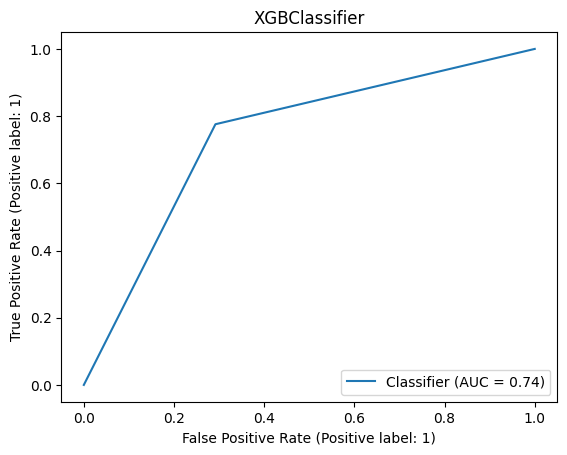

CatBoosting_Classifier
CatBoosting_Classifier Model Train Accuracy: 0.92
CatBoosting_Classifier Model Test AUC Score: 0.74
CatBoosting_Classifier Model Test Accuracy Score: 0.74
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       394
           1       0.75      0.74      0.75       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

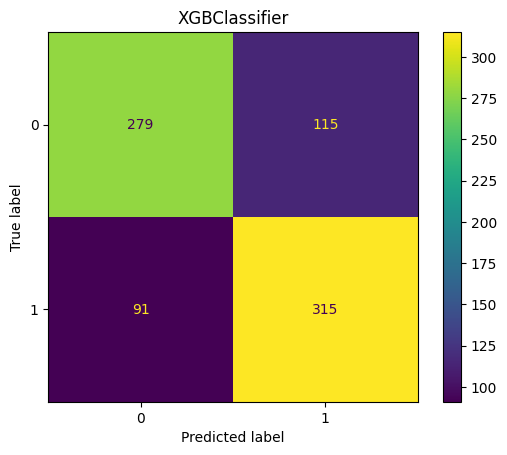

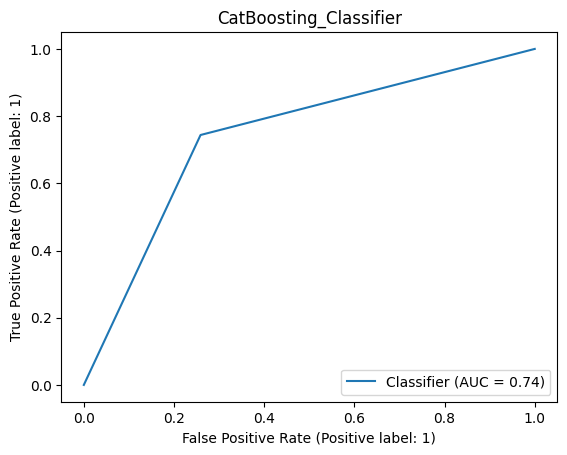

AdaBoost_Classifier
AdaBoost_Classifier Model Train Accuracy: 0.64
AdaBoost_Classifier Model Test AUC Score: 0.57
AdaBoost_Classifier Model Test Accuracy Score: 0.57
              precision    recall  f1-score   support

           0       0.56      0.61      0.59       394
           1       0.59      0.54      0.56       406

    accuracy                           0.57       800
   macro avg       0.57      0.57      0.57       800
weighted avg       0.57      0.57      0.57       800



d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\water\.venv-water\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

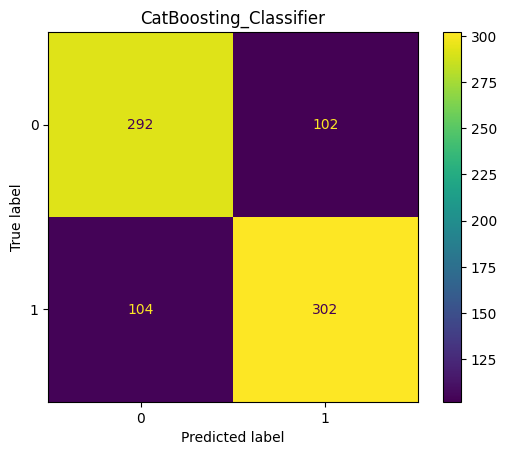

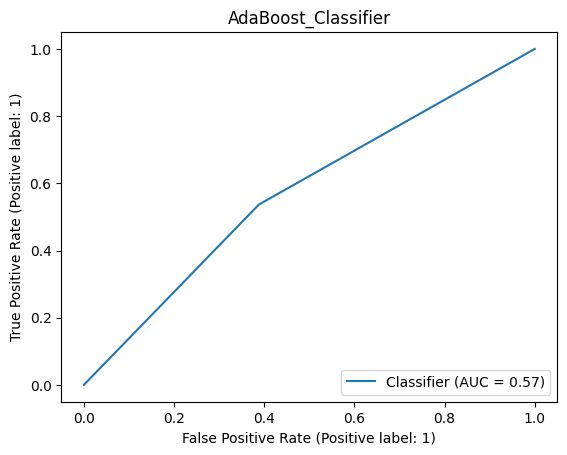

<Figure size 640x480 with 0 Axes>

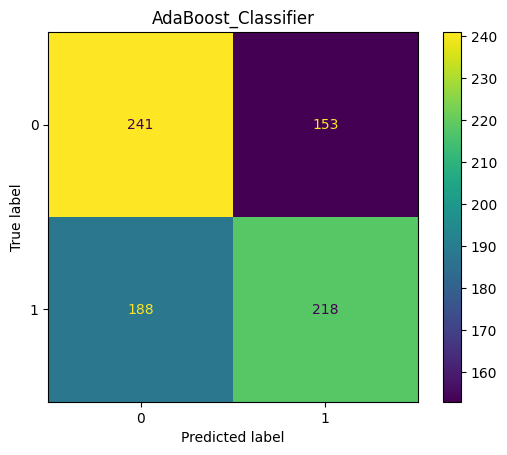

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import(
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay,accuracy_score
import mlflow
import mlflow.sklearn

models = {
                "Random_Forest": RandomForestClassifier(),
                "Decision_Tree": DecisionTreeClassifier(),
                "Gradient_Boosting": GradientBoostingClassifier(),
                "Logistic_Regression": LogisticRegression(),
                "XGBClassifier": XGBClassifier(),
                "CatBoosting_Classifier": CatBoostClassifier(verbose=False),
                "AdaBoost_Classifier": AdaBoostClassifier()
            }


mlflow.set_experiment("scikit_water_experiment")
with mlflow.start_run():
    for i in range(len(list(models))):
        model=list(models.values())[i]
        model_name=list(models.keys())[i]
        print(model_name)
        
        model.fit(X_train_fit,y_train)
        mlflow.sklearn.log_model(model,f"{model_name}")
        
        train_acc=model.score(X_train_fit,y_train)
        print(f'{model_name} Model Train Accuracy: {train_acc:.2f}')
        mlflow.log_metric("train_acc", train_acc)


        x_test=pipeline.transform(X_test)
        preds = model.predict(x_test)    
        auc_score = roc_auc_score(y_test, preds)
        acc_score=accuracy_score(y_test,preds)

        print(f'{model_name} Model Test AUC Score: {auc_score:.2f}')
        print(f'{model_name} Model Test Accuracy Score: {acc_score:.2f}')
        mlflow.log_metric("AUC Score", auc_score)
        mlflow.log_metric("Accuracy Score",acc_score)

        print(classification_report(y_test,preds))

        RocCurveDisplay.from_predictions(y_test, preds)
        plt.title(f'{model_name}')
        plt.show()
        plt.savefig(f"{model_name}_roc_curve.png")
        mlflow.log_artifact(f"{model_name}_roc_curve.png")

        cm=confusion_matrix(y_test,preds)
        cm=confusion_matrix(y_test,preds,labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
        disp.plot()
    
        plt.title(f'{model_name}')
        plt.savefig(f"{model_name}_conf_matrix.png")
        mlflow.log_artifact(f"{model_name}_conf_matrix.png")
        mlflow.end_run()        



